In [1470]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [1485]:
dnames=['BEST_dorothea_AB','BEST_dorothea_CD','KEGG','REACTOME','CGP','BIOCARTA']
bname='progeny'
atype='_abs'
rtype='_filtered'

In [1486]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname1,rtype,atype),
                      sep=',',header=0,index_col=0).abs().max()
        score_1minus2=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname1,rtype,dname2,rtype,atype),
                                     sep=',',header=0,index_col=0).abs().max()
        if dname1<dname2:
            score=score[pd.Series(score_1minus2.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_1minus2.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_1minus2.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
fil=delta_df['Delta'].abs()<2
delta_df=delta_df[fil]

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


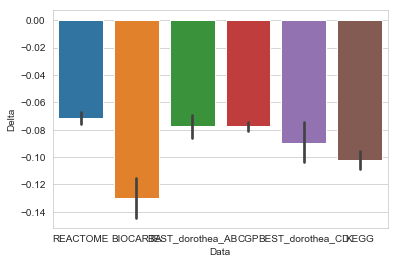

In [1487]:
sns.barplot(x='Data',y='Delta',data=delta_df)

In [1488]:
model=smf.ols('Delta ~ Data',data=delta_df).fit()

In [1489]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Data,5.0,43.346225,8.669245,35.979324,5.930465e-37
Residual,150453.0,36251.762385,0.240951,NaN,NaN


In [1490]:
model.pvalues

Intercept                   1.755653e-55
Data[T.BEST_dorothea_CD]    1.462425e-01
Data[T.BIOCARTA]            3.637553e-15
Data[T.CGP]                 9.771311e-01
Data[T.KEGG]                3.071182e-05
Data[T.REACTOME]            2.696825e-01
dtype: float64

In [1491]:
model.params

Intercept                  -0.077514
Data[T.BEST_dorothea_CD]   -0.012183
Data[T.BIOCARTA]           -0.052691
Data[T.CGP]                 0.000155
Data[T.KEGG]               -0.024462
Data[T.REACTOME]            0.005971
dtype: float64

In [1492]:
delta={}
for dname1 in dnames:
    delta[dname1]=[]
    for dname2 in list(set(dnames)-set([dname1])):
        score=pd.read_csv('../results/benchmark/z_scores/%s/single/%s%s%s.csv' % (bname,dname2,rtype,atype),
                      sep=',',header=0,index_col=0).abs().max()
        score_2minus1=pd.read_csv('../results/benchmark/z_scores/%s/overlap/%s%s_minus_%s%s%s.csv' % (bname,dname2,rtype,dname1,rtype,atype),
                                     sep=',',header=0,index_col=0).abs().max()
        if dname2<dname1:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[0]).values]
        else:
            score=score[pd.Series(score_2minus1.index).apply(lambda x:x.split('*')[1]).values]
        delta[dname1]+=list(score_2minus1.values-score.values)
delta_df=pd.DataFrame(columns=['Data','Delta'])
for dname in delta:
    temp=pd.DataFrame(columns=delta_df.columns)
    temp['Delta']=delta[dname]
    temp['Data']=dname
    delta_df=pd.concat([delta_df,temp])
fil=delta_df['Delta'].abs()<2
delta_df=delta_df[fil]

/Users/benceszalai/Library/Enthought/Canopy/edm/envs/Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


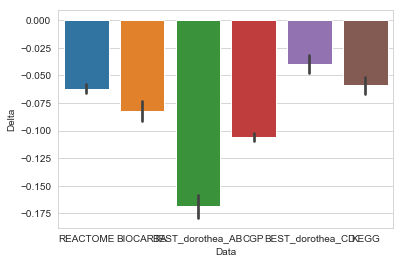

In [1493]:
sns.barplot(x='Data',y='Delta',data=delta_df)

In [1494]:
model=smf.ols('Delta ~ Data',data=delta_df).fit()

In [1495]:
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
Data,5.0,141.858054,28.371611,118.069438,4.362404e-125
Residual,150453.0,36153.250555,0.240296,NaN,NaN


In [1496]:
model.pvalues

Intercept                   5.209275e-250
Data[T.BEST_dorothea_CD]     5.196359e-54
Data[T.BIOCARTA]             3.942672e-39
Data[T.CGP]                  1.577791e-30
Data[T.KEGG]                 8.315070e-76
Data[T.REACTOME]             7.462958e-85
dtype: float64

In [1497]:
model.params

Intercept                  -0.168598
Data[T.BEST_dorothea_CD]    0.129032
Data[T.BIOCARTA]            0.086329
Data[T.CGP]                 0.062574
Data[T.KEGG]                0.109516
Data[T.REACTOME]            0.106338
dtype: float64